<a href="https://colab.research.google.com/github/dkchebet7/Classification/blob/master/week9_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART A

#Objectives:


*   To determine whether or not one is going to die in the titanic given various conditions/variables




# Metrics of success:
         *   Record the various accuracy levels under various k sizes 
         *   Achieve an accaeptable accuracy of say above 90%
         



# Experimental Designs:

1.   Clean Data

2.   Exploratory Data Analysis
        *   Hypothesis testing in ctegorical data
        
3.  Analysis:
      *   Use KNN Classifier
      *   Determine accuracy of the classifier



In [0]:
## Importing necessary libraries 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [17]:
## Loading the Titanic dataset

titanic = pd.read_csv('/content/train.csv')

## Reading the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [0]:
## Checking the data size,null values and the datatypes

print(titanic.shape)
print('\n')
print(titanic.isnull().sum())
print('\n')
print(titanic.dtypes)

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Titanic data has 891 rows and 12 columns.

It also has 177 missing values in the aga column, 687 missing in the Cabin column and 2 in the embarked column.

There are various datatypes in the entire dataset ranging from integers,object and float as shown above.

#### New columns

In [18]:
## Creating new family_size column

titanic['Family_Size']=titanic['SibSp']+titanic['Parch']
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size'],
      dtype='object')

A new column of family size(The sum of the number of siblings and the number od parents in the cabin) has been added to the dataframe. This is so as to get the total number of family members each victim has and to do away with confusing columns of(siblings and parents)

In [20]:
titanic['Fare_Per_Person']=titanic['Fare']/(titanic['Family_Size']+1)
print(titanic.columns)
print('\n')
print(titanic.Fare_Per_Person.nunique())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Fare_Per_Person'],
      dtype='object')


289


A new column of fare has been created.This column gives the total amount spent on individual person in the ship.

The total number of unique values in this new dataset id 289.

#### Dropping unecessary columns

In [21]:
## Dropping unecessary columns

titanic = titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis = 1)

## Viewing the remaining dataset
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family_Size,Fare_Per_Person
0,0,3,male,22.0,1,0,S,1,3.62500
1,1,1,female,38.0,1,0,C,1,35.64165
2,1,3,female,26.0,0,0,S,0,7.92500
3,1,1,female,35.0,1,0,S,1,26.55000
4,0,3,male,35.0,0,0,S,0,8.05000


After a visual analysis of the dataset and the replacemnt of some of tne columns (passengerId, name, fare, cabin)can be dropped/removed fom the analysis as they are not useful.

#### Null values

In [0]:
## Recahecking for null values

print(titanic.isnull().sum())


Survived             0
Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Embarked             2
Family_Size          0
Fare_Per_Person      0
dtype: int64


There are 177 null values in the Age column and 2 in the Embarked column

In [0]:
# ###
# cols = ['Age','Embarked']

# for i in cols:
#   if titanic[i] == 

In [0]:
## fill all null values in the age column with the mean of the group

titanic['Age']= titanic['Age'].fillna(titanic['Age'].mode()[0])

titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],axis = 0)

The above codes hepls us fill the missing values in age and emarked with the mode of each group .

In [0]:
## Checking for null values in the data

titanic.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Embarked           0
Family_Size        0
Fare_Per_Person    0
dtype: int64

This shows there are no missing/null values in the dataset.

## Exploratory Data Analysis

In [0]:
## Creating a copy to work with
## Viewing the data

titanic2 = titanic.copy()
titanic2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family_Size,Fare_Per_Person
0,0,3,male,22.0,1,0,S,1,3.62500
1,1,1,female,38.0,1,0,C,1,35.64165
2,1,3,female,26.0,0,0,S,0,7.92500
3,1,1,female,35.0,1,0,S,1,26.55000
4,0,3,male,35.0,0,0,S,0,8.05000


In [0]:
## checking relationship between survived,sex and embarked


from scipy import stats

gender =  pd.crosstab(titanic2['Sex'], titanic2['Survived'])
gender

Survived,0,1
Sex,,
female,81,233
male,468,109


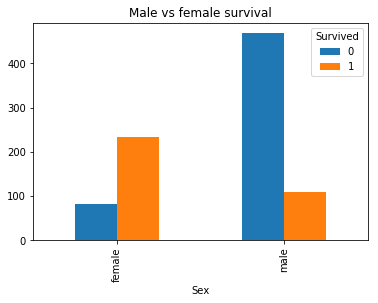

In [0]:
## Plotting the gender cross table
gender.plot(kind = 'bar', title = 'Male vs female survival')

  From the croostable resulrs, more male survived compared to female.
  This should help us try and figure out why more female lost their lives

In [0]:

embarked = pd.crosstab(titanic2['Embarked'],titanic2['Survived'])
embarked

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


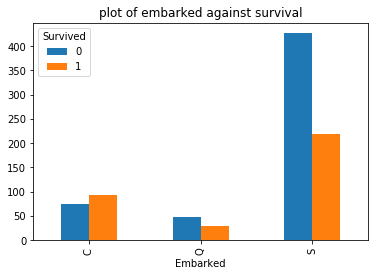

In [0]:
## Plotting embarked crosstable
embarked.plot(kind = 'bar', title = 'plot of embarked against survival')

From the embarked crosstable,people that embarked from 'S' both died and  survived. This can tell us that the region of embarking doe nor really matter when it comes to survival

##### Chi_square test

*  H0: There is no relationship between Gender and Survival
*  H1: There is a relationship between Gender and Survival


In [0]:
stats.chi2_contingency(gender)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

The first value (260.717) is the Chi-square value, followed by the p-value (1.197), then comes the degrees of freedom (1), and lastly it outputs the expected frequencies as an array. 
We can reject the null hypothesis as the p-value is less than 0.05. and say that there is a relationship between gender and survival

Chi_square on embarked

*  H0: There is no relationship between region Embarked and Survival
*  H1: There is a relationship between region Embarked and Survival


In [0]:
stats.chi2_contingency(embarked)

(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  64.48484848],
        [ 47.44444444,  29.55555556],
        [398.04040404, 247.95959596]]))

chi_square value = 25.964452881874784
p_value = 2.3008626481449577e-06
d.o.f = 2

We can reject the null hypothesis as the p-value is less than 0.05. and say that there is a relationship between embarked and survival

## Analysis

## K Nearest Neighbor

In [0]:
## Impoting necesssary libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


In [0]:
## Recalling the data
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family_Size,Fare_Per_Person
0,0,3,male,22.0,1,0,S,1,3.62500
1,1,1,female,38.0,1,0,C,1,35.64165
2,1,3,female,26.0,0,0,S,0,7.92500
3,1,1,female,35.0,1,0,S,1,26.55000
4,0,3,male,35.0,0,0,S,0,8.05000


In [0]:
## Groping data into X(independent variables) and y(dependent variable)
X =pd.DataFrame(titanic.drop(['Survived'],axis = 1))
y = titanic['Survived']

The dataset has been grouped into x and y variables.Where X has all the other variables but 'survived' column and y only has the y column

In [0]:
## Checking the unique values in  Sex and Embarkes column
print(titanic.Sex.unique())
print(titanic.Embarked.unique())

['male' 'female']
['S' 'C' 'Q']


sex column has binary features(male or female) whereas embarked dataset has 3 features(s,q abd c)

In [25]:
## Label Encoding
X = pd.get_dummies(X)

print(X.head())

   Pclass   Age  SibSp  Parch  ...  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0       3  22.0      1      0  ...         1           0           0           1
1       1  38.0      1      0  ...         0           1           0           0
2       3  26.0      0      0  ...         0           0           0           1
3       1  35.0      1      0  ...         0           0           0           1
4       3  35.0      0      0  ...         1           0           0           1

[5 rows x 11 columns]


All the X values have been changed to numerical

In [0]:
## Applying KNN

accuracy = []
score = []
for i in range(1,9):
  ## Split data into train and test sets
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)
  
  ## Standardise data
  Scale = MinMaxScaler()
  X_train = Scale.fit_transform(X_train)
  X_test = Scale.transform(X_test)
  
  ## Applying KNN
  k = KNeighborsClassifier(i)
  k.fit(X_train,y_train)
  
  ##Predicting the X_test data
  y_pred = k.predict(X_test)
  
  ## Testing the accuracy of our predictions
  acc = accuracy_score(y_test,y_pred)
  f = f1_score(y_test,y_pred)
  
  accuracy.append(acc)
  score.append(f)
  
## Creating a dataframe of the accuracy score at different levels  
prediction = pd.DataFrame({'accuracy': accuracy, 'f1_score': score},index = range(1,9))
prediction

,accuracy,f1_score
1,0.748603,0.651163
2,0.798883,0.666667
3,0.815642,0.722689
4,0.832402,0.732143
5,0.810056,0.711864
6,0.843575,0.745455
7,0.832402,0.736842
8,0.826816,0.725664


This is the results of accuracy level in several k sizes.The highest accuracy is when k is 6 with an accuracy of 84%

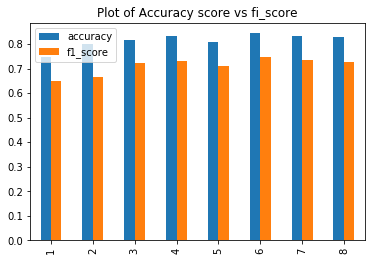

In [0]:
## Plotting the predictions
prediction.plot(kind = 'bar', title = 'Plot of Accuracy score vs fi_score')
#prediction.plot.title('Accuracy vs f1_score Graph')

In [0]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[107  10]
 [ 21  41]]


The matrix above details that out of 117 that survived, 107 were correctly predicted and 10 falsely predicted to be dead.
And out of 62 that died 41 were accurately predicted and 21 falsely identifiedto be dead

## Grouping test and train into a 70:30 split

In [26]:
## Applying KNN

accuracy = []
score = []
for i in range(1,9):
  ## Split data into train and test sets
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)
  
  ## Standardise data
  Scale = MinMaxScaler()
  X_train = Scale.fit_transform(X_train)
  X_test = Scale.transform(X_test)
  
  ## Applying KNN
  k = KNeighborsClassifier(i)
  k.fit(X_train,y_train)
  
  ##Predicting the X_test data
  y_pred = k.predict(X_test)
  
  ## Testing the accuracy of our predictions
  acc = accuracy_score(y_test,y_pred)
  f = f1_score(y_test,y_pred)
  
  accuracy.append(acc)
  score.append(f)
  
## Creating a dataframe of the accuracy score at different levels  
prediction = pd.DataFrame({'accuracy': accuracy, 'f1_score': score},index = range(1,9))
prediction

,accuracy,f1_score
1,0.738806,0.650000
2,0.809701,0.679245
3,0.791045,0.695652
4,0.832090,0.730539
5,0.813433,0.715909
6,0.824627,0.728324
7,0.820896,0.727273
8,0.809701,0.701754


This is the results of accuracy level in several k sizes.The highest accuracy is when k is 4 with(83%)

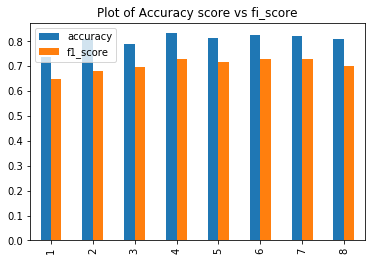

In [27]:
## Plotting the predictions
prediction.plot(kind = 'bar', title = 'Plot of Accuracy score vs fi_score')
#prediction.plot.title('Accuracy vs f1_score Graph')

In [28]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[157  17]
 [ 34  60]]


The matrix above details that out of 174 that survived, 157 were correctly predicted and 10 falsely predicted to be dead.
And out of 62 that died 60 were accurately predicted and 34 falsely identifiedto be dead

## Grouping test and train into a 60:40 split

In [0]:
## Applying KNN

accuracy = []
score = []
for i in range(1,9):
  ## Split data into train and test sets
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 10)
  
  ## Standardise data
  Scale = MinMaxScaler()
  X_train = Scale.fit_transform(X_train)
  X_test = Scale.transform(X_test)
  
  ## Applying KNN
  k = KNeighborsClassifier(i)
  k.fit(X_train,y_train)
  
  ##Predicting the X_test data
  y_pred = k.predict(X_test)
  
  ## Testing the accuracy of our predictions
  acc = accuracy_score(y_test,y_pred)
  f = f1_score(y_test,y_pred)
  
  accuracy.append(acc)
  score.append(f)
  
## Creating a dataframe of the accuracy score at different levels  
prediction = pd.DataFrame({'accuracy': accuracy, 'f1_score': score},index = range(1,9))
prediction

,accuracy,f1_score
1,0.742297,0.654135
2,0.798319,0.666667
3,0.778711,0.687747
4,0.798319,0.681416
5,0.784314,0.675105
6,0.795518,0.675556
7,0.778711,0.658009
8,0.784314,0.657778


This is the results of accuracy level in several k sizes.The highest accuracy is when k is 4 with an accuracy of 79%  

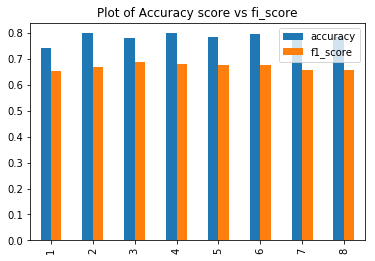

In [0]:
## Plotting the predictions
prediction.plot(kind = 'bar', title = 'Plot of Accuracy score vs fi_score')
#prediction.plot.title('Accuracy vs f1_score Graph')

In [0]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[206  23]
 [ 54  74]]


The matrix above details that out of229 that survived, 206 were correctly predicted and 23 falsely predicted to be dead.
And out of 128 that died 74 were accurately predicted and 54 falsely identifiedto be dead

#### Conclusion

*   The KNN Classifier has soo much room for improvement as it misclassified very mant people. 

*   Find an optimization technique of the KNN Model

*   Use Logistic regression to get better results in terms of accuracy


*   The 70:30 split gave more accuracy as compared to 60:40 split. However this difference is quite small and thus we can rule out overfitting and conclude that our model is quite ok but can be improved. 


*   Accuracy reduces as the test size is reduces as well(20% = 84% Accuracy, 30% = 83% Accuracy and 40% = 79% Accuracy) . This could tells us we need alot more training data to get the most real results overally.








# PART B

#Objectives:


*   To determine whether or not a message is spam or not 



# Metrics of success:
         *   Record the various accuracy levels under various classifiers 
         *   Achieve an accaeptable accuracy of say above 90%
         



# Experimental Designs:

1.   Clean Data

2.   Exploratory Data Analysis

3.  Analysis:
      *   Use Berneulli Classifier
      *   Use Multinomial Classifier
      *   Determine accuracy of the classifier



In [0]:
## Importing Necesssary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [0]:
## Loading the dataset

#spam = pd.read_csv('/content/spam.csv',encoding= 'latin1')
spam = pd.read_csv('/content/spambase_csv.csv')
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Data Cleaning

In [0]:
## Checking for null values,datatypes and size of data

print(spam.shape)
print('\n')
print(spam.isnull().sum().sum())
# print('\n')
# print(spam.dtypes)

(4601, 58)


0


The data has 4601 rows and 58 columns,
The dataset has no null values

## Analysis

In [0]:
#Grouping X and Y

X = spam.iloc[:,:48]
y= spam.iloc[:,-1]

In [0]:
## Fitting the model

#Creating a list of classifiers to use
classify = [BernoulliNB(),MultinomialNB()]

for i, j in zip(classify, ['bern', 'mult']):
  
## Training the dataset  
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 0)
  
## Fitting the data into the model  
  sc = MinMaxScaler()
  X_train= sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  model = i.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  acc =  np.mean(y_pred == y_test)
  
  print(j + ' accuracy is: ' + str(acc))

bern accuracy is: 0.8653637350705755
mult accuracy is: 0.8642779587404995


Berneulli accuracy is 86.53% 
Multinomial dataset has an accuracy of 86.42%

In [0]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[519  19]
 [106 277]]


The matrix above details that out of 538 that survived, 519 were correctly predicted and 19 falsely predicted to be dead.
And out of 381 that died 277 were accurately predicted and 106 falsely identifiedto be dead